#Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
import pandas as pd
path='/content/gdrive/MyDrive/Colab Notebooks/Bài 5 Phân lớp văn bản'
X_train = pd.read_csv(path+'/train/sents.txt',sep='\n', header=None, index_col=None)
y_train = pd.read_csv(path+'/train/sentiments.txt',sep='\n', header=None, index_col=None)
X_dev = pd.read_csv(path+'/dev/sents.txt', sep='\n',header=None, index_col=None)
y_dev = pd.read_csv(path+'/dev/sentiments.txt', sep='\n', header=None, index_col=None)
X_test = pd.read_csv(path+'/test/sents.txt',sep='\n', header=None, index_col=None)
y_test = pd.read_csv(path+'/test/sentiments.txt',sep='\n', header=None, index_col=None)
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

#a

In [ ]:
X_train.head()

,0
0,slide giáo trình đầy đủ .
1,"nhiệt tình giảng dạy , gần gũi với sinh viên ."
2,đi học đầy đủ full điểm chuyên cần .
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng..."


In [ ]:
pd.DataFrame(y_train).head()

,0
0,2
1,2
2,0
3,0
4,2


#b
Kích thước của dữ liệu là bao nhiêu trên các tập train, dev và test?

Có 11426 dòng thuộc tập train

Có 1583 dòng thuộc tập dev

Có 3166 dòng thuộc tập test





In [ ]:
X_train.shape

(11426, 1)

In [ ]:
X_dev.shape

(1583, 1)

In [ ]:
X_test.shape

(3166, 1)

#c

In [ ]:
import numpy as np

count=np.unique(y_train, return_counts=True)

In [ ]:
count[0]

array([0, 1, 2])

In [ ]:
count[1]

array([5325,  458, 5643])

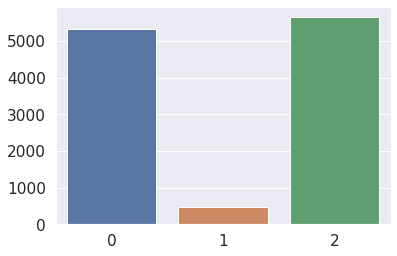

In [ ]:
import seaborn as sns

sns.barplot(x=count[0], y=count[1])

In [ ]:
pd.DataFrame(y_dev).head()

,0
0,0
1,0
2,2
3,0
4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


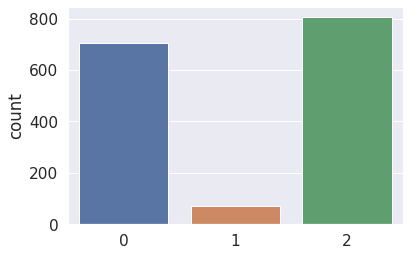

In [ ]:
import seaborn as barplot
y_dev
barplot.countplot(y_dev)

In [ ]:
count=np.unique(y_dev, return_counts=True)
count[1]

array([705,  73, 805])

In [ ]:
pd.DataFrame(y_test).head()

,0
0,2
1,2
2,2
3,2
4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


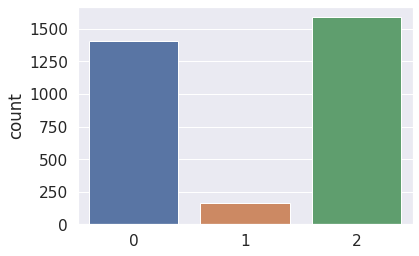

In [ ]:
import seaborn as barplot
y_test
barplot.countplot(y_test)

In [ ]:
count=np.unique(y_test, return_counts=True)
count[1]

array([1409,  167, 1590])

#Trích xuất đặc trưng

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))

vectorizer.fit(X_train[0])
X_train_encoded = vectorizer.transform(X_train[0])
X_dev_encoded = vectorizer.transform(X_dev[0])
X_test_encoded = vectorizer.transform(X_test[0])

pd.DataFrame(vectorizer.get_feature_names_out())

,0
0,10
1,100
2,10h
3,10h30
4,11
...,...
2454,ổn
2455,ủa
2456,ủng
2457,ức


In [ ]:
X_train_encoded

<11426x2459 sparse matrix of type '<class 'numpy.int64'>'
	with 133838 stored elements in Compressed Sparse Row format>

#Huấn luyện mô hình

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test_encoded)

In [ ]:
y_pred

array([2, 2, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, y_pred)))

print("f1_score: {} ".format(f1_score(y_test, y_pred, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, y_pred, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8840808591282375 
f1_score: 0.7041924971509287 
precision_score: 0.7574990290782253 
recall_score: 0.6861116062575138 


In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)


In [ ]:
cf

array([[1300,   25,   84],
       [  64,   36,   67],
       [ 114,   13, 1463]])

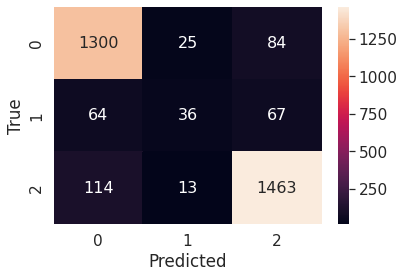

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline


clf = make_pipeline(SVC(C=1.0, kernel='linear',gamma='auto'))
clf.fit(X_train_encoded, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto', kernel='linear'))])

Dự đoán

In [ ]:
predictions_SVM = clf.predict(X_test_encoded)
predictions_SVM

array([2, 2, 2, ..., 2, 0, 0])

Ma trận nhầm lẫn

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predictions_SVM)

In [ ]:
cf

array([[1294,   34,   81],
       [  54,   49,   64],
       [ 127,   21, 1442]])

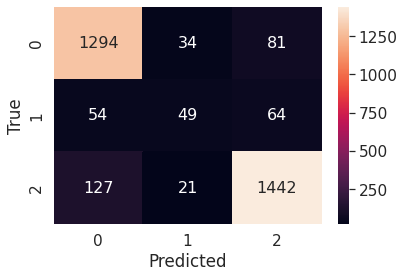

In [ ]:
sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, predictions_SVM)))

print("f1_score: {} ".format(f1_score(y_test, predictions_SVM, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, predictions_SVM, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, predictions_SVM, average="macro")))

Accuracy: 0.8796588755527479 
f1_score: 0.722254339180525 
precision_score: 0.7523582073162349 
recall_score: 0.7062377479107607 


#Trích xuất đặt trưng

#Sử dụng TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()

vectorizer2.fit(X_train[0])

X_train_encoded2 = vectorizer2.transform(X_train[0])
X_dev_encoded2 = vectorizer2.transform(X_dev[0])
X_test_encoded2 = vectorizer2.transform(X_test[0])

pd.DataFrame(vectorizer2.get_feature_names_out())


,0
0,10
1,100
2,10h
3,10h30
4,11
...,...
2454,ổn
2455,ủa
2456,ủng
2457,ức


In [ ]:
X_train_encoded2

<11426x2459 sparse matrix of type '<class 'numpy.float64'>'
	with 133838 stored elements in Compressed Sparse Row format>

#Huấn luyện và dự đoán trên Logistic

# Huấn luyện

In [ ]:
model = LogisticRegression()
model.fit(X_train_encoded2, y_train)

LogisticRegression()

#Dự đoán

In [ ]:
y_pred=model.predict(X_test_encoded2)
y_pred

array([0, 2, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, y_pred)))

print("f1_score: {} ".format(f1_score(y_test, y_pred, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, y_pred, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8809222994314593 
f1_score: 0.6514111568382064 
precision_score: 0.7915430551516596 
recall_score: 0.6457385241568766 


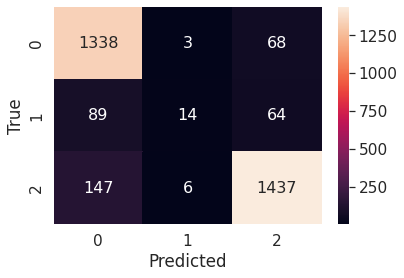

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#SVM

#Huấn luyện

In [ ]:
clf = make_pipeline(SVC(C=1.0, kernel='linear',gamma='auto'))
clf.fit(X_train_encoded2, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto', kernel='linear'))])

#Dự đoán

In [ ]:
predictions_SVM_4 = clf.predict(X_test_encoded2)
predictions_SVM_4

array([0, 2, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, predictions_SVM_4)))

print("f1_score: {} ".format(f1_score(y_test, predictions_SVM_4, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, predictions_SVM_4, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, predictions_SVM_4, average="macro")))

Accuracy: 0.8872394188250158 
f1_score: 0.6629922594438388 
precision_score: 0.8587652021585459 
recall_score: 0.6539888793726338 


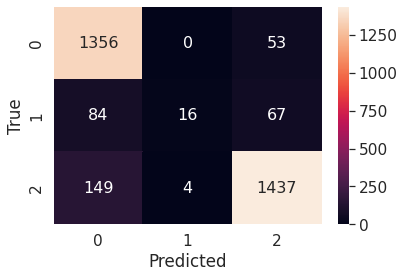

In [ ]:
cf = confusion_matrix(y_test, predictions_SVM_4)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#

# Lưu mô hình

In [ ]:
from joblib import dump, load

dump(model, 'model.joblib')

['model.joblib']

Word segmentation

#Cài đặt pyvi

In [ ]:
pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyvi import ViTokenizer

sentences_train = [ViTokenizer.tokenize(sentence) for sentence in X_train[0]]
sentences_dev = [ViTokenizer.tokenize(sentence) for sentence in X_dev[0]]
sentences_test = [ViTokenizer.tokenize(sentence) for sentence in X_test[0]]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))

vectorizer.fit(X_train[0])
X_train_sentences = vectorizer.transform(sentences_train)
X_dev_sentences = vectorizer.transform(sentences_dev)
X_test_sentences = vectorizer.transform(sentences_test)

pd.DataFrame(vectorizer.get_feature_names_out())

,0
0,10
1,100
2,10h
3,10h30
4,11
...,...
2454,ổn
2455,ủa
2456,ủng
2457,ức


#Huấn luyện và dự đoán trên Logistic

In [ ]:
model = LogisticRegression()
model.fit(X_train_sentences, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#Dự đoán

In [ ]:
y_pred_6=model.predict(X_test_sentences)
y_pred_6

array([2, 2, 2, ..., 2, 0, 0])

In [ ]:
print("Accuracy: {} ".format(accuracy_score(y_test, y_pred_6)))

print("f1_score: {} ".format(f1_score(y_test, y_pred_6, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, y_pred_6, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, y_pred_6, average="macro")))


Accuracy: 0.8584965255843335 
f1_score: 0.6193093243632682 
precision_score: 0.6870957621095738 
recall_score: 0.6195520961326896 


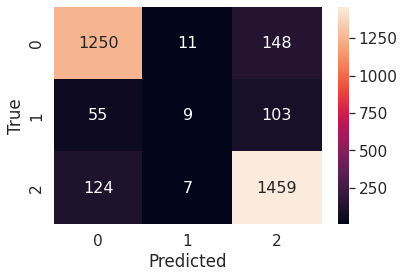

In [ ]:
cf = confusion_matrix(y_test, y_pred_6)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#SVM

#Huấn luyện

In [ ]:
clf = make_pipeline(SVC(C=1.0, kernel='linear',gamma='auto'))
clf.fit(X_train_sentences , y_train)

Pipeline(steps=[('svc', SVC(gamma='auto', kernel='linear'))])

#Dự đoán

In [ ]:
predictions_SVM_6 = clf.predict(X_test_sentences)
predictions_SVM_6

array([2, 2, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, predictions_SVM_6)))

print("f1_score: {} ".format(f1_score(y_test, predictions_SVM_6, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, predictions_SVM_6, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, predictions_SVM_6, average="macro")))

Accuracy: 0.8603916614024005 
f1_score: 0.6268089068063502 
precision_score: 0.6992416247392318 
recall_score: 0.6247327868823686 


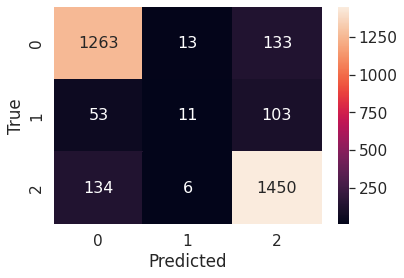

In [ ]:
cf = confusion_matrix(y_test, predictions_SVM_6)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Điều chỉnh tham số

# Grid Search

In [ ]:
from matplotlib.text import Transform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

parameters = {
    "vect__ngram_range": ((1,1),(1,2),(1,3)),
    "vect__lowercase": (True, False),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
grid_search.get_params().keys()

thislist=[]
thislist.extend(X_train[0])


grid_search.fit(list(thislist), list(y_train))

print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3)), 'vect__lowercase': (True, False)}
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best score: 0.903
Best parameters set:
	vect__lowercase: True
	vect__ngram_range: (1, 2)


#Kiểm thử với tham số vừa tìm được
ngram_range=(1,2), lowercase=True

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_7 = TfidfVectorizer(ngram_range=(1,2), lowercase=True) # Bộ siêu tham số

vectorizer_7.fit(X_train[0])

X_train_encoded_7 = vectorizer_7.transform(X_train[0])
X_dev_encoded_7 = vectorizer_7.transform(X_dev[0])
X_test_encoded_7 = vectorizer_7.transform(X_test[0])

# Logistic

# Huấn luyện và dự đoán

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_encoded_7, y_train)


y_pred_7 =model.predict(X_test_encoded_7)
y_pred_7


array([2, 2, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Accuracy: {} ".format(accuracy_score(y_test, y_pred_7)))

print("f1_score: {} ".format(f1_score(y_test, y_pred_7, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, y_pred_7, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, y_pred_7, average="macro")))

Accuracy: 0.8894504106127605 
f1_score: 0.6484631108559814 
precision_score: 0.8558588019419785 
recall_score: 0.6468208014874902 


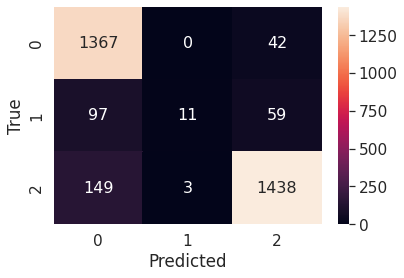

In [ ]:
cf = confusion_matrix(y_test, y_pred_7)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SVM

# Huấn luyện

In [ ]:
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline


clf = make_pipeline(SVC(C=1.0, kernel='linear',gamma='auto'))
clf.fit(X_train_encoded_7, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto', kernel='linear'))])

In [ ]:
predictions_SVM_7 = clf.predict(X_test_encoded_7)
predictions_SVM_7

array([2, 2, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Accuracy: {} ".format(accuracy_score(y_test, predictions_SVM_7)))

print("f1_score: {} ".format(f1_score(y_test, predictions_SVM_7, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, predictions_SVM_7, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, predictions_SVM_7, average="macro")))

Accuracy: 0.894188250157928 
f1_score: 0.6730714163296828 
precision_score: 0.8280347272986313 
recall_score: 0.6623084214419962 


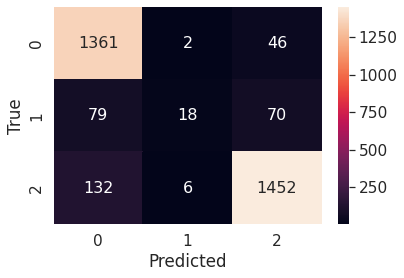

In [ ]:
cf = confusion_matrix(y_test, predictions_SVM_7)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Liệt kê các trường hợp dự đoán sai của mô hình

#Liệt kê những trường hợp dự đoán sai

In [ ]:
index=0

for  y_test1, y_pred1 in zip( y_test,y_pred):
  if y_pred1 != y_test1:
     print(sentences_test[index])
     print(y_pred1, y_test1)
  index+=1

nói tiếng anh lưu_loát .
0 2
tính điểm thi_đua các nhóm .
1 2
trong trường macbook thầy_số hai thì không có máy nào số một .
0 2
bắt_đầu buổi học đúng giờ .
0 2
cách mà cô tiếp_cận với sinh_viên .
2 1
phòng học thoáng mát , trang thiết_bị đầy_đủ .
0 2
giữa lý_thuyết từ_vựng với trò_chơi để dễ tiếp_thu .
2 0
môn_học này giúp chúng em hiểu ra những vấn_đề cơ_bản .
2 1
phần_lớn chỉ là lý_thuyết và bài_tập .
0 2
như vậy tụi em sẽ định_hướng tốt hơn và tập_trung vào những thứ cần_thiết .
0 1
ấn_tượng nhất doubledot dạy không cần máy_chiếu hay laptop , nhưng lượng bài giảng có_thể nói là " khủng " , nhìn thầy ghi bài giảng lên bảng mà bất_ngờ .
0 2
đưa nhiều bài_tập khó mà có lời_giải cho sinh_viên về nhà nghiên_cứu .
0 2
rất thực_tế không dài_dòng .
0 2
thêm hoạt_động của sinh_viên , giúp sinh_viên chủ_động hơn .
2 0
giảng_viên đảm_bảo thời_gian trên lớp , tạo điều_kiện trong quá_trình thực_hành và thi thực_hành .
0 2
có up bài cho sinh_viên làm thêm bài_tập .
0 2
cách dạy đổi_mới .
0 2
ví_

Trực quan số nhãn

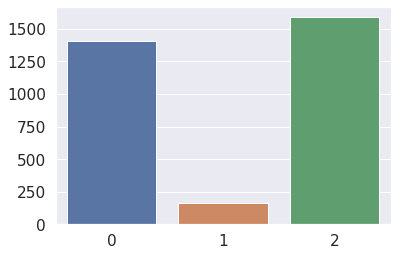

In [ ]:
import seaborn as sns

sns.barplot(x=count[0], y=count[1])

# Nguyên nhân nào mô hình bị dự đoán sai?

Là do dữ liệu train bị lệch về nhãn 0 và 2 quá nhiều nên khi dự đoán sẽ rơi vào 0 và 2 cao hơn nên nhãn 1 thường bị dự đoán sai



#Phương pháp khắc phục

Code thêm hàm augmentation data

Cắt giảm data chia theo tỉ lệ

# Phân tích sâu

# Đọc dữ liệu

In [ ]:
import pandas as pd
path='/content/gdrive/MyDrive/Colab Notebooks/Bài 5 Phân lớp văn bản'
X_train = pd.read_csv(path+'/train/sents.txt',sep='\n', header=None, index_col=None)
y_train = pd.read_csv(path+'/train/topics.txt',sep='\n', header=None, index_col=None)
X_dev = pd.read_csv(path+'/dev/sents.txt', sep='\n',header=None, index_col=None)
y_dev = pd.read_csv(path+'/dev/topics.txt', sep='\n', header=None, index_col=None)
X_test = pd.read_csv(path+'/test/sents.txt',sep='\n', header=None, index_col=None)
y_test = pd.read_csv(path+'/test/topics.txt',sep='\n', header=None, index_col=None)
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

In [ ]:
import numpy as np

count=np.unique(y_train, return_counts=True)

In [ ]:
count[0]

array([0, 1, 2, 3])

In [ ]:
count[1]

array([8166, 2201,  497,  562])

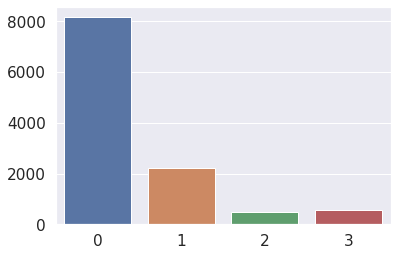

In [ ]:
import seaborn as sns

sns.barplot(x=count[0], y=count[1])

In [ ]:
pd.DataFrame(y_dev).head()

,0
0,1
1,0
2,0
3,0
4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


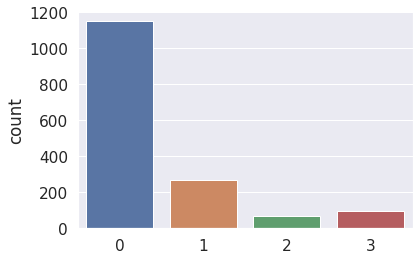

In [ ]:
import seaborn as barplot
y_dev
barplot.countplot(y_dev)

In [ ]:
pd.DataFrame(y_test).head()

,0
0,0
1,0
2,0
3,0
4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


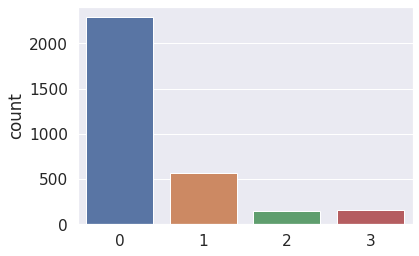

In [ ]:
import seaborn as barplot
y_test
barplot.countplot(y_test)

#Trích xuất đặc trưng

#Sử dụng CountVector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer9 = CountVectorizer(ngram_range=(1,1))

vectorizer9.fit(X_train[0])
X_train_encoded9 = vectorizer9.transform(X_train[0])
X_dev_encoded9 = vectorizer9.transform(X_dev[0])
X_test_encoded9 = vectorizer9.transform(X_test[0])

pd.DataFrame(vectorizer9.get_feature_names_out())

,0
0,10
1,100
2,10h
3,10h30
4,11
...,...
2454,ổn
2455,ủa
2456,ủng
2457,ức


#Huấn luyện mô hình

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_encoded9, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred9=model.predict(X_test_encoded9)

In [ ]:
y_pred9

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, y_pred9)))

print("f1_score: {} ".format(f1_score(y_test, y_pred9, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, y_pred9, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, y_pred9, average="macro")))

Accuracy: 0.8436512950094757 
f1_score: 0.7191474460701679 
precision_score: 0.7472578298221927 
recall_score: 0.6972258649687032 


In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred9)


In [ ]:
cf

array([[2118,  142,    4,   26],
       [ 165,  372,    4,   31],
       [  13,    6,  124,    2],
       [  64,   37,    1,   57]])

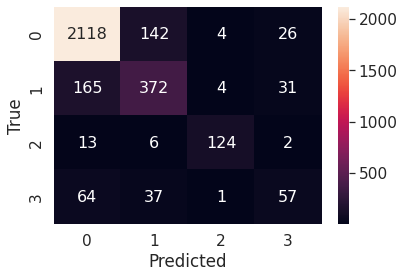

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline


clf = make_pipeline(SVC(C=1.0, kernel='linear',gamma='auto'))
clf.fit(X_train_encoded, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto', kernel='linear'))])

Dự đoán

In [ ]:
predictions_SVM9 = clf.predict(X_test_encoded9)
predictions_SVM9

array([0, 0, 0, ..., 0, 0, 1])

Ma trận nhầm lẫn

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predictions_SVM9)

In [ ]:
cf

array([[2105,  145,    4,   36],
       [ 165,  366,    7,   34],
       [  11,    5,  127,    2],
       [  62,   29,    1,   67]])

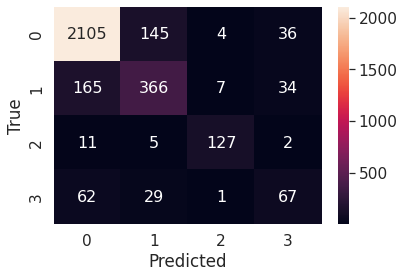

In [ ]:
sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, predictions_SVM9)))

print("f1_score: {} ".format(f1_score(y_test, predictions_SVM9, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, predictions_SVM9, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, predictions_SVM9, average="macro")))

Accuracy: 0.8417561591914087 
f1_score: 0.7270139655894663 
precision_score: 0.7414159785658065 
recall_score: 0.7140799576058815 


#Sử dụng TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_9_ = TfidfVectorizer()

vectorizer_9_.fit(X_train[0])

X_train_encoded_9_ = vectorizer_9_.transform(X_train[0])
X_dev_encoded_9_ = vectorizer_9_.transform(X_dev[0])
X_test_encoded_9_ = vectorizer_9_.transform(X_test[0])

pd.DataFrame(vectorizer_9_.get_feature_names_out())


,0
0,10
1,100
2,10h
3,10h30
4,11
...,...
2454,ổn
2455,ủa
2456,ủng
2457,ức


#Huấn luyện mô hình

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_encoded_9_, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_9_=model.predict(X_test_encoded_9_)

In [ ]:
y_pred_9_

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, y_pred_9_)))

print("f1_score: {} ".format(f1_score(y_test, y_pred_9_, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, y_pred_9_, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, y_pred_9_, average="macro")))

Accuracy: 0.8562855337965888 
f1_score: 0.7156691925795905 
precision_score: 0.8021269381231344 
recall_score: 0.6776000953883562 


In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_9_)


In [ ]:
cf

array([[2161,  117,    2,   10],
       [ 172,  389,    1,   10],
       [  10,   12,  122,    1],
       [  80,   39,    1,   39]])

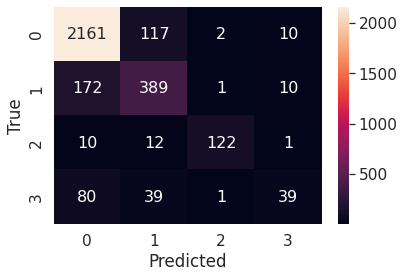

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline


clf = make_pipeline(SVC(C=1.0, kernel='linear',gamma='auto'))
clf.fit(X_train_encoded_9_, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto', kernel='linear'))])

Dự đoán

In [ ]:
predictions_SVM_9_ = clf.predict(X_test_encoded_9_)
predictions_SVM_9_

array([0, 0, 0, ..., 0, 0, 1])

Ma trận nhầm lẫn

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predictions_SVM_9_)

In [ ]:
cf

array([[2142,  131,    4,   13],
       [ 171,  393,    2,    6],
       [   9,    6,  129,    1],
       [  74,   41,    1,   43]])

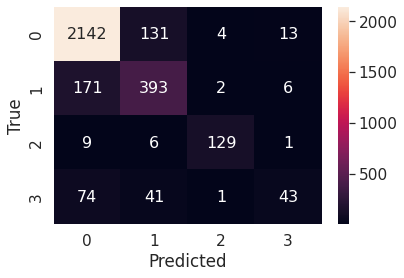

In [ ]:
sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy: {} ".format(accuracy_score(y_test, predictions_SVM_9_)))

print("f1_score: {} ".format(f1_score(y_test, predictions_SVM_9_, average="macro")))

print("precision_score: {} ".format(precision_score(y_test, predictions_SVM_9_, average="macro")))

print("recall_score: {} ".format(recall_score(y_test, predictions_SVM_9_, average="macro")))

Accuracy: 0.8550221099178774 
f1_score: 0.7268533608974185 
precision_score: 0.8033313193149088 
recall_score: 0.6956323850220897 


#Điều chỉnh tham số:

# CountVectorizer

#Grid Search

In [ ]:
from matplotlib.text import Transform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

parameters = {
    "vect__ngram_range": ((1,1),(1,2),(1,3)),
    "vect__lowercase": (True, False),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
grid_search.get_params().keys()

thislist=[]
thislist.extend(X_train[0])


grid_search.fit(list(thislist), list(y_train))

print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3)), 'vect__lowercase': (True, False)}
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best score: 0.854
Best parameters set:
	vect__lowercase: True
	vect__ngram_range: (1, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# TfidfVectorizer

# Grid Search

In [ ]:
from matplotlib.text import Transform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

parameters = {
    "vect__ngram_range": ((1,1),(1,2),(1,3)),
    "vect__lowercase": (True, False),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
grid_search.get_params().keys()

thislist=[]
thislist.extend(X_train[0])


grid_search.fit(list(thislist), list(y_train))

print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3)), 'vect__lowercase': (True, False)}
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best score: 0.837
Best parameters set:
	vect__lowercase: True
	vect__ngram_range: (1, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Phân tích lỗi

# Dựa vào dự đoán của mô hình Logistic của TfidfVectorizer

In [ ]:
index=0

for  y_test1, y_pred1 in zip( y_test,y_pred_9_):
  if y_pred1 != y_test1:
     print(sentences_test[index])
     print(y_pred1, y_test1)
  index+=1

trong trường macbook thầy_số hai thì không có máy nào số một .
2 3
sinh_viên không tiếp_thu kịp cũng như_không hiểu gì .
0 1
còn những phần tìm bao đóng , chứng_minh dạng chuẩn chưa làm rõ .
0 1
giáo_trình chưa có hợp_lý .
0 1
cung_cấp bài_tập đa_dạng .
1 0
cô vui_tính , học không áp_lực .
0 1
cô nhiệt_tình , giảng bài hiệu_quả .
0 1
không biết được chính_xác bao_giờ học thật để đi học .
0 1
thêm hoạt_động của sinh_viên , giúp sinh_viên chủ_động hơn .
0 1
giảng_viên đảm_bảo thời_gian trên lớp , tạo điều_kiện trong quá_trình thực_hành và thi thực_hành .
1 0
slide thầy chiếu lên màn chiếu doubledot dày_đặc chữ , nhìn không rõ_ràng .
0 1
em không thích như vậy tí_xíu nào .
3 0
thời_gian các bạn lên làm bài_tập thì thầy nên giảng cho các sinh_viên khác chưa làm được .
0 1
không slide .
1 0
năng_động , cập_nhật kiến_thức thêm những kiến_thức thực_tế và bổ_ích .
1 0
học thì quá ít nhưng khi thi thì quá nhiều yêu_cầu viết code trong đề thi thì sao mà sinh_viên có_thể làm được .
1 3
bài giảng 

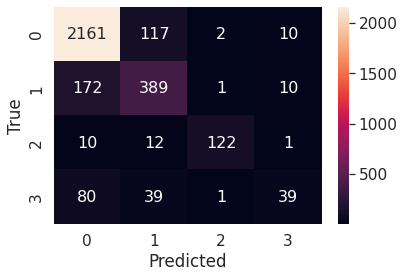

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_9_)

sn.set(font_scale=1.4)
sn.heatmap(cf, annot= True, annot_kws={"size":16 }, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Lí do

# Số nhãn train bị lệch nhãn 0 (lecturer topic) và 1(program topic) nhiều hơn 2 nhãn còn lại nên mô hình dự đoán lệch về phía 0 và 1 nhiều hơn

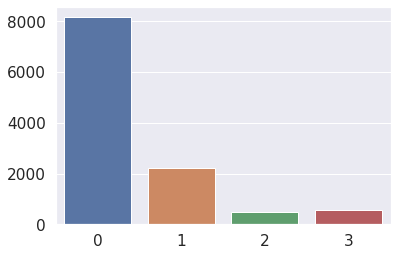

In [ ]:
import numpy as np

count=np.unique(y_train, return_counts=True)

import seaborn as sns

sns.barplot(x=count[0], y=count[1])
